## Агломеративная Кластеризация Практика

### <b><span style='color:#686dec'>Загружаем данные</span></b>

Используем уже знакомый нам датасет <code>make_blobs</code>

In [1]:
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns; sns.set(style='whitegrid')

np.random.seed(0)

# Количество объектов в каждом датасете
n_samples = 1500

# Вписанные круги
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
# Оставляем только признаки датасета, так как для кластеризации нам не нужны истинные классы объектов
X, y = noisy_circles
noisy_circles = X

# Полукруги
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
X, y = noisy_moons
noisy_moons = X

# Кластеры в форме круга
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
X, y = blobs
blobs = X

# Отсутствие кластерной структуры
no_structure = np.random.rand(n_samples, 2)

# Кластеры лентовидной формы    
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = X_aniso

# Кластеры в форме кругов с различной дисперсией
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)
X, y = varied
varied = X

### <b><span style='color:#686dec'>Обучаем Модель</span></b>

Гиперпараметры модели

- `n_clusters` число кластеров которых мы ожидаем
- `affinity` критерии оценки когда находим дистанцию между данными
- `linkage` критерии объединения кластеров

In [2]:
from sklearn.cluster import AgglomerativeClustering

# affinity:
# “euclidean”, “l1”, “l2”, “manhattan”, “cosine”, or “precomputed”

# linkage:
# “ward”, “complete”, “average”, “single”

ac = AgglomerativeClustering(n_clusters=2,
                             affinity='euclidean',
                             linkage='ward', 
                            )

- В алгоритме мы сначала нормализуем признаки объектов, а затем строим матрицу смежности <code>connectivity</code> (расстояние между объектами датасета)
- Далее создаём объект агломеративной кластеризации (<code>AgglomerativeClustering</code>) и передаём в него матрицу (<code>X</code>) 
- Обучаем алгоритм (<code>fit</code>) игнорируем предупреждения и строим предсказания.

Обучение модели AgglomerativeClustering проходит аналогично обучению модели K-means:

```python
ac.fit(X)
```
Обучив, мы можем узнать, в какой кластер попал каждый из объектов:
```python
ac.labels_
```




### <b><span style='color:#686dec'>Применение Модели</span></b>

- Посмотрим, как агломеративная кластеризация будет работать с нашими наборами данных.
- Мы будем варьировать только число кластеров.
- Будем также использовать `матрицу смежности`, для которой нужен параметр n_neighbors, то есть число ближайших соседей.

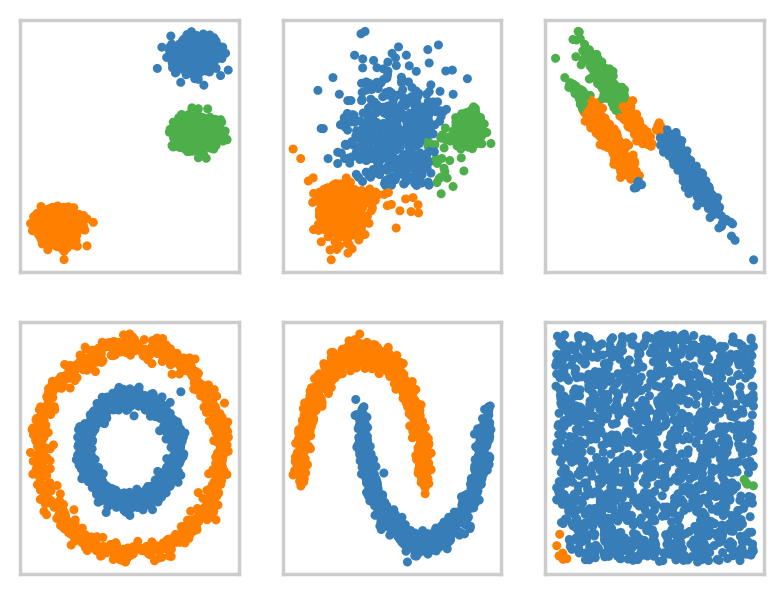

In [3]:
import warnings; warnings.filterwarnings('ignore')
from sklearn.neighbors import kneighbors_graph

# создаём массив пар – датасета и соответствующих для него параметров алгоритма
datasets_params_list = [
    (blobs, {'n_clusters': 3, 'n_neighbors': 10}),
    (varied, {'n_clusters': 3, 'n_neighbors': 2}),
    (aniso, {'n_clusters': 3, 'n_neighbors': 2}),
    (noisy_circles, {'n_clusters': 2, 'n_neighbors': 10}),
    (noisy_moons, {'n_clusters': 2, 'n_neighbors': 10}),
    (no_structure, {'n_clusters': 3, 'n_neighbors': 10})]

for i, (X, ac_params) in enumerate(datasets_params_list, start=1):
    
    # нормализуем данные_
    X = StandardScaler().fit_transform(X)
    
    # строим матрицу смежности
    connectivity = kneighbors_graph(X, 
                                    n_neighbors=ac_params['n_neighbors'], 
                                    include_self=False)
    
    # делаем матрицу смежности симметричной
    connectivity = 0.5 * (connectivity + connectivity.T)
    
    ac = AgglomerativeClustering(n_clusters=ac_params['n_clusters'], 
                                 linkage='average',
                                 connectivity=connectivity)
    ac.fit(X)
    y_pred = ac.labels_.astype(np.int)
    
    plt.subplot(f'23{i}')
    plt.xticks([]); plt.yticks([])
    colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                         '#f781bf', '#a65628', '#984ea3',
                                         '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_pred) + 1))))
    plt.scatter(X[:, 0], X[:, 1], s=5,color=colors[y_pred])

### <b><span style='color:#686dec'>Задание</span></b>

#### <b>Задание <span style='color:#F1A424'>4.7.1</span></b> 

При каком значении параметра <code>linkage</code> при создании объекта `AgglomerativeClustering` критерием объединения кластеров будет среднее расстояние между объектами объединяемых кластеров?

In [4]:
ac = AgglomerativeClustering(linkage='average')

#### <b>Задание <span style='color:#F1A424'>4.7.2</span></b> 

Обучите модель AgglomerativeClustering с параметром <code>n_clusters=3</code> на признаках исходного датасета. Напишите число <code>листьев</code> в иерархическом дереве, полученном при обучении:

In [5]:
model = AgglomerativeClustering(n_clusters=3)

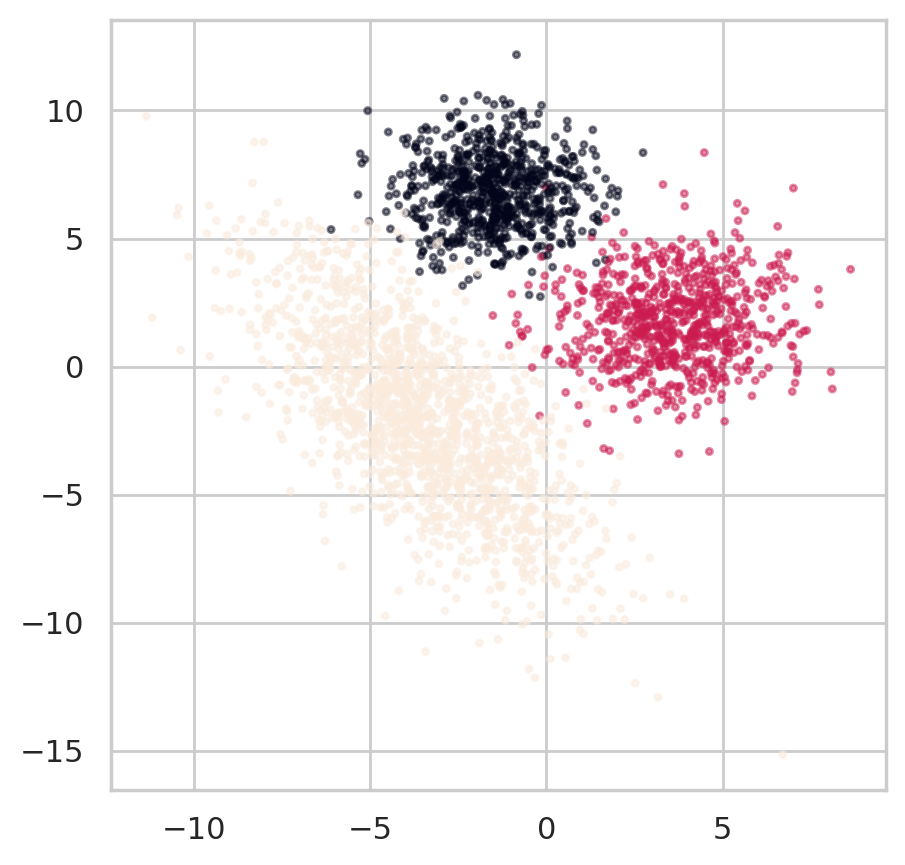

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

# Визуализируем исходные данные
plt.rcParams['figure.figsize'] = 5, 5
plt.scatter(X[:, 0], X[:, 1], s=5,c=y, alpha=0.5)
plt.show()

In [7]:
model.fit(X)
labels = model.labels_
labels

array([2, 2, 0, ..., 1, 1, 1])

In [8]:
# количкство лисьтев
model.n_leaves_

3000

#### <b>Задание <span style='color:#F1A424'>4.7.3</span></b> 

- Подсчитайте количество элементов в каждом из получившихся кластеров. 
- Запишите в форму ниже три числа через пробел(без запятых!): количество элементов в кластере 0, в кластере 1 и в кластере 2.
- Записывайте строго в таком порядке.

Для подсчёта элементов в списке можно воспользоваться функцией `numpy.unique` с параметром `return_counts=True`

In [9]:
from collections import Counter

Counter(labels)

Counter({2: 746, 0: 1112, 1: 1142})

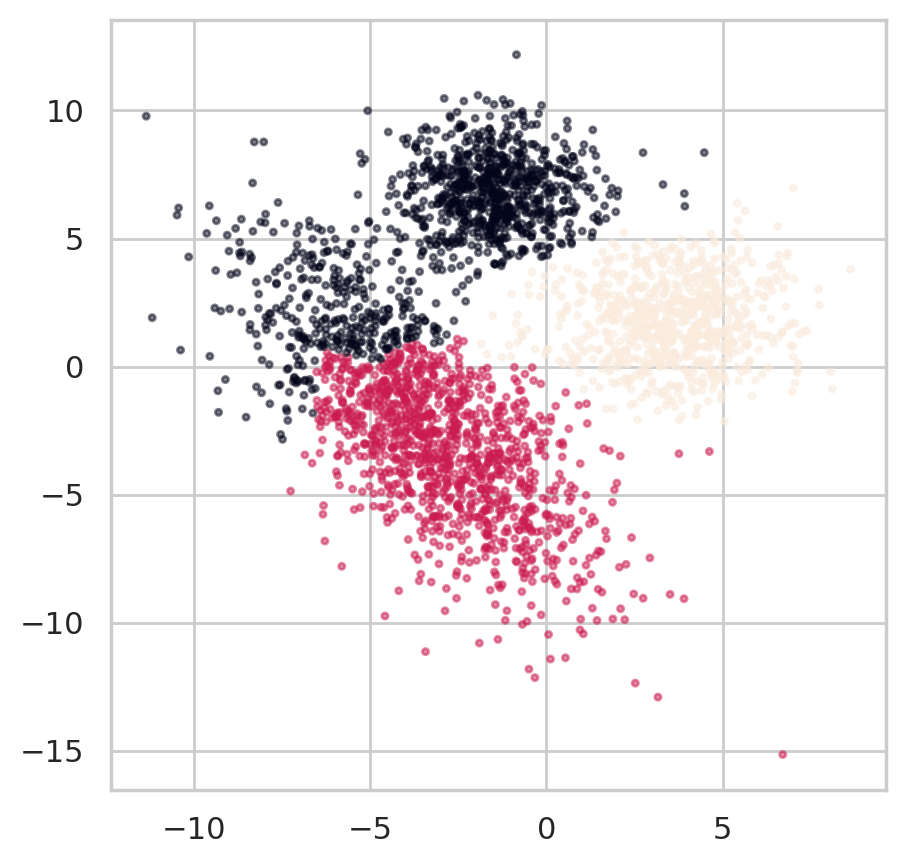

In [10]:
plt.rcParams['figure.figsize'] = 5, 5
plt.scatter(X[:, 0], X[:, 1], s=5,c=labels, alpha=0.5)
plt.show()

#### <b>Задание <span style='color:#F1A424'>4.7.4</span></b> 

При создании модели AgglomerativeClustering можно указать <code>матрицу смежности</code>, передав её в параметр <code>connectivity</code>. 

В переменной connectivity будет хранится матрица смежности для ненаправленного графа на основе датасета.

Обучите модель AgglomerativeClustering с параметром n_clusters=3 и составленной матрицей смежности на признаках исходного датасета. Подсчитайте количество элементов в каждом из получившихся кластеров. Выведите три числа через пробел: количество элементов в кластере 0, в кластере 1 и в кластере 2.

Подсказка: При решении данной задачи стандартизация должна быть выключена.

Counter({0: 1486, 2: 768, 1: 746})


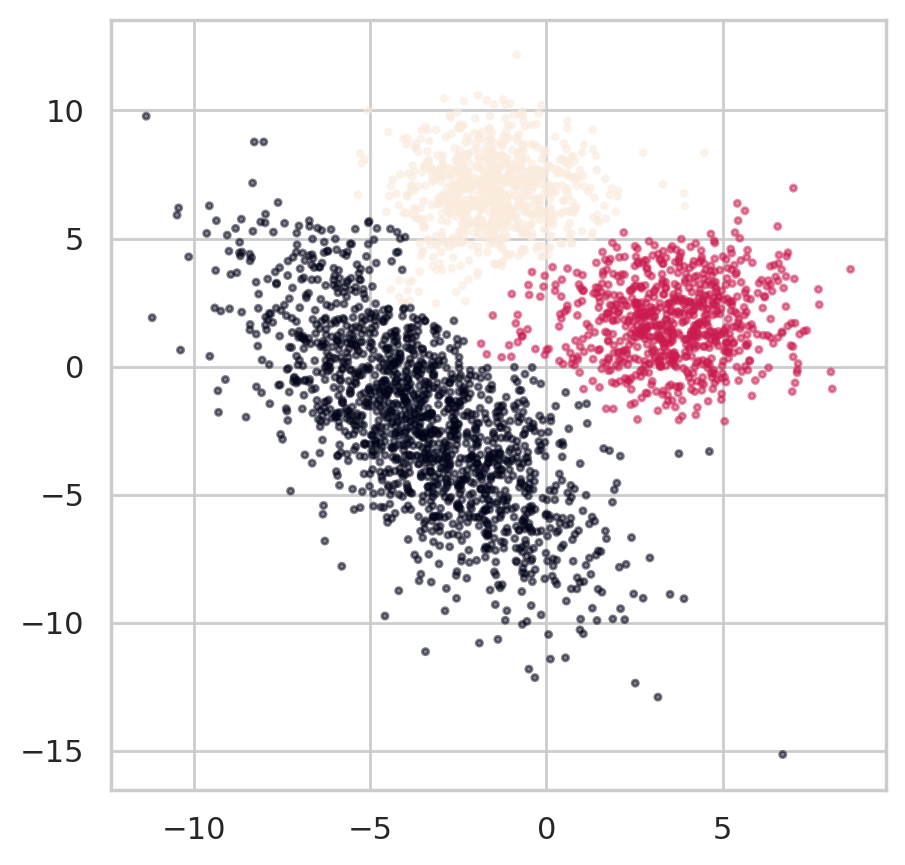

In [11]:
from sklearn.neighbors import kneighbors_graph

connectivity = kneighbors_graph(X, n_neighbors=6, include_self=False)
connectivity = 0.5 * (connectivity + connectivity.T)

model = AgglomerativeClustering(n_clusters=3,
                                connectivity=connectivity)

model.fit(X)
labels = model.labels_
print(Counter(labels))

plt.rcParams['figure.figsize'] = 5, 5
plt.scatter(X[:, 0], X[:, 1], s=5,c=labels, alpha=0.5)
plt.show()

#### <b>Задание <span style='color:#F1A424'>4.7.5</span></b> 

- Постройте `дендрограмму` с помощью пакета scipy
- На выходе должно получиться изображение иерархического дерева.
- Постройте дендрограмму на исходном наборе данных. 
- Сколько получится кластеров, если граничным расстоянием для разделения кластеров взять 150.

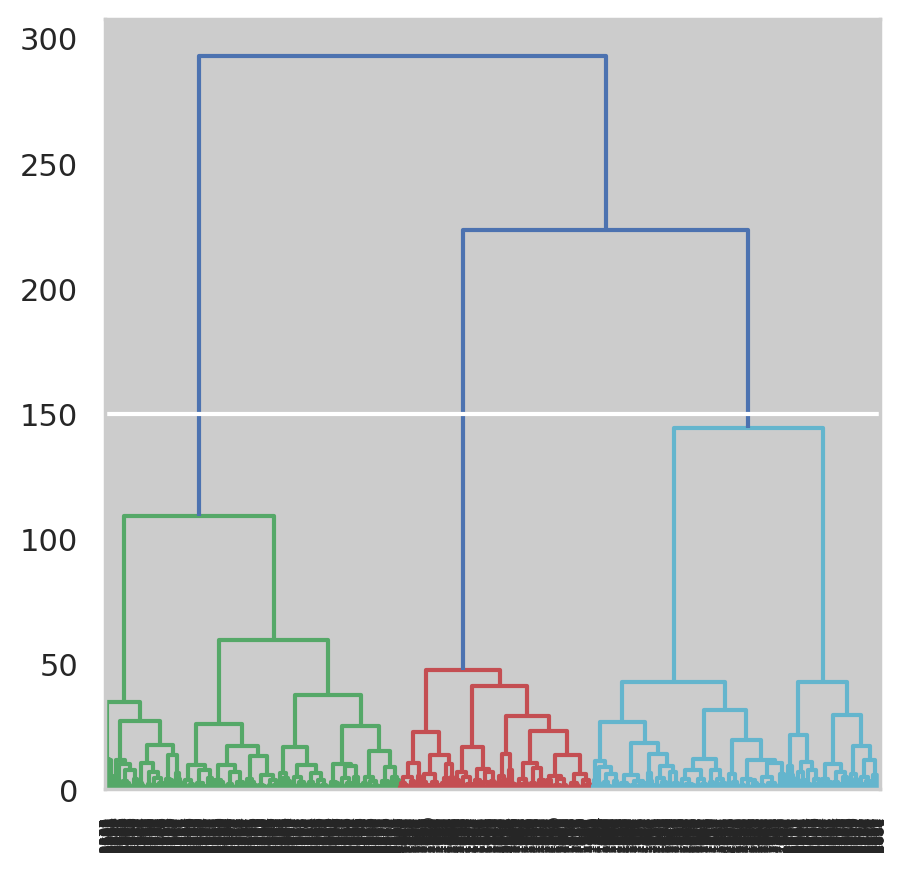

In [13]:
from scipy.cluster.hierarchy import dendrogram, linkage

# подготовим данные для построения дендрограммы
# ещё один способ выполнить агломеративную кластеризацию
Z = linkage(X, "ward")

# строим дендрограмму
fig,ax = plt.subplots(1,1)
dendrogram(Z, leaf_rotation=90.,ax=ax)
ax.axhline(y=150,xmin=0,xmax=200)
plt.show()

#### <b>Задание <span style='color:#F1A424'>4.7.6</span></b> 

- Постройте `дендрограмму` с помощью пакета scipy
- На выходе должно получиться изображение иерархического дерева.
- Постройте дендрограмму на исходном наборе данных. 
- Сколько получится кластеров, если граничным расстоянием для разделения кластеров взять 100

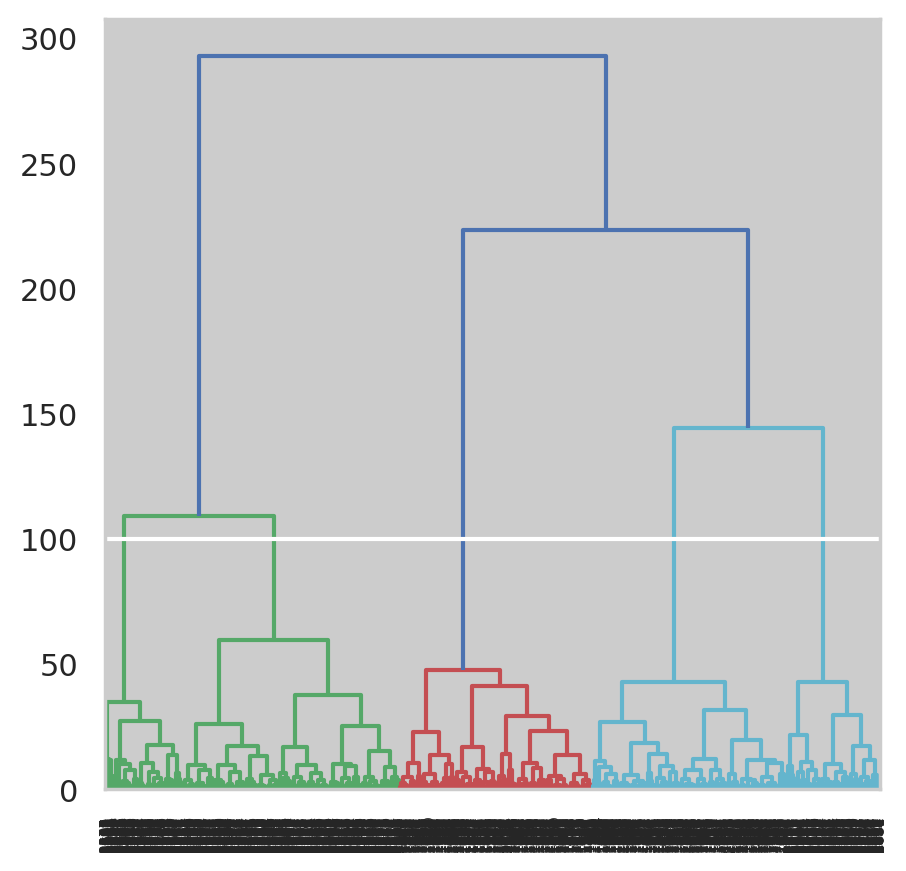

In [14]:
from scipy.cluster.hierarchy import dendrogram, linkage

# подготовим данные для построения дендрограммы
# ещё один способ выполнить агломеративную кластеризацию
Z = linkage(X, "ward")

# строим дендрограмму
fig,ax = plt.subplots(1,1)
dendrogram(Z, leaf_rotation=90.,ax=ax)
ax.axhline(y=100,xmin=0,xmax=200)
plt.show()